# Clustering examples

## Iris dataset description:

- Dataframe containing four numerical and one discrete variable. 
- Numerical columns represent the length and width of the petals and sepals from 150 flowers of three species: setosa, virginica and versicolor (given on the last field, a vector with possible 3 levels)


In [1]:
# load iris
import pandas as pd

iris_df = pd.read_csv('../data/iris.csv', index_col=0)
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
iris_df.shape

(150, 5)

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
iris_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.isnull().sum() # no missing values

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

## Preprocessing

### Standardize the data (clustering methods should work with standardized data) 

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1]) # exclude the species column (target)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Clustering

## Hierarchical clustering

Create a full dendogram based on hierarchical/agglomerative clustering using scipy. This performs the clustering using the "single" method for cluster distance calculation and the Euclidean distance as similarity metric. Change the *method* and *metric* parameters to test other alternatives.

In [7]:
from scipy.cluster.hierarchy import linkage

Z = linkage(iris_scaled, method='single', metric='euclidean')    
Z[:10]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [4.00000000e+01, 1.54000000e+02, 1.33836265e-01, 3.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [3.00000000e+01, 1.53000000e+02, 1.33836265e-01, 3.00000000e+00]])

### Plot the dendogram

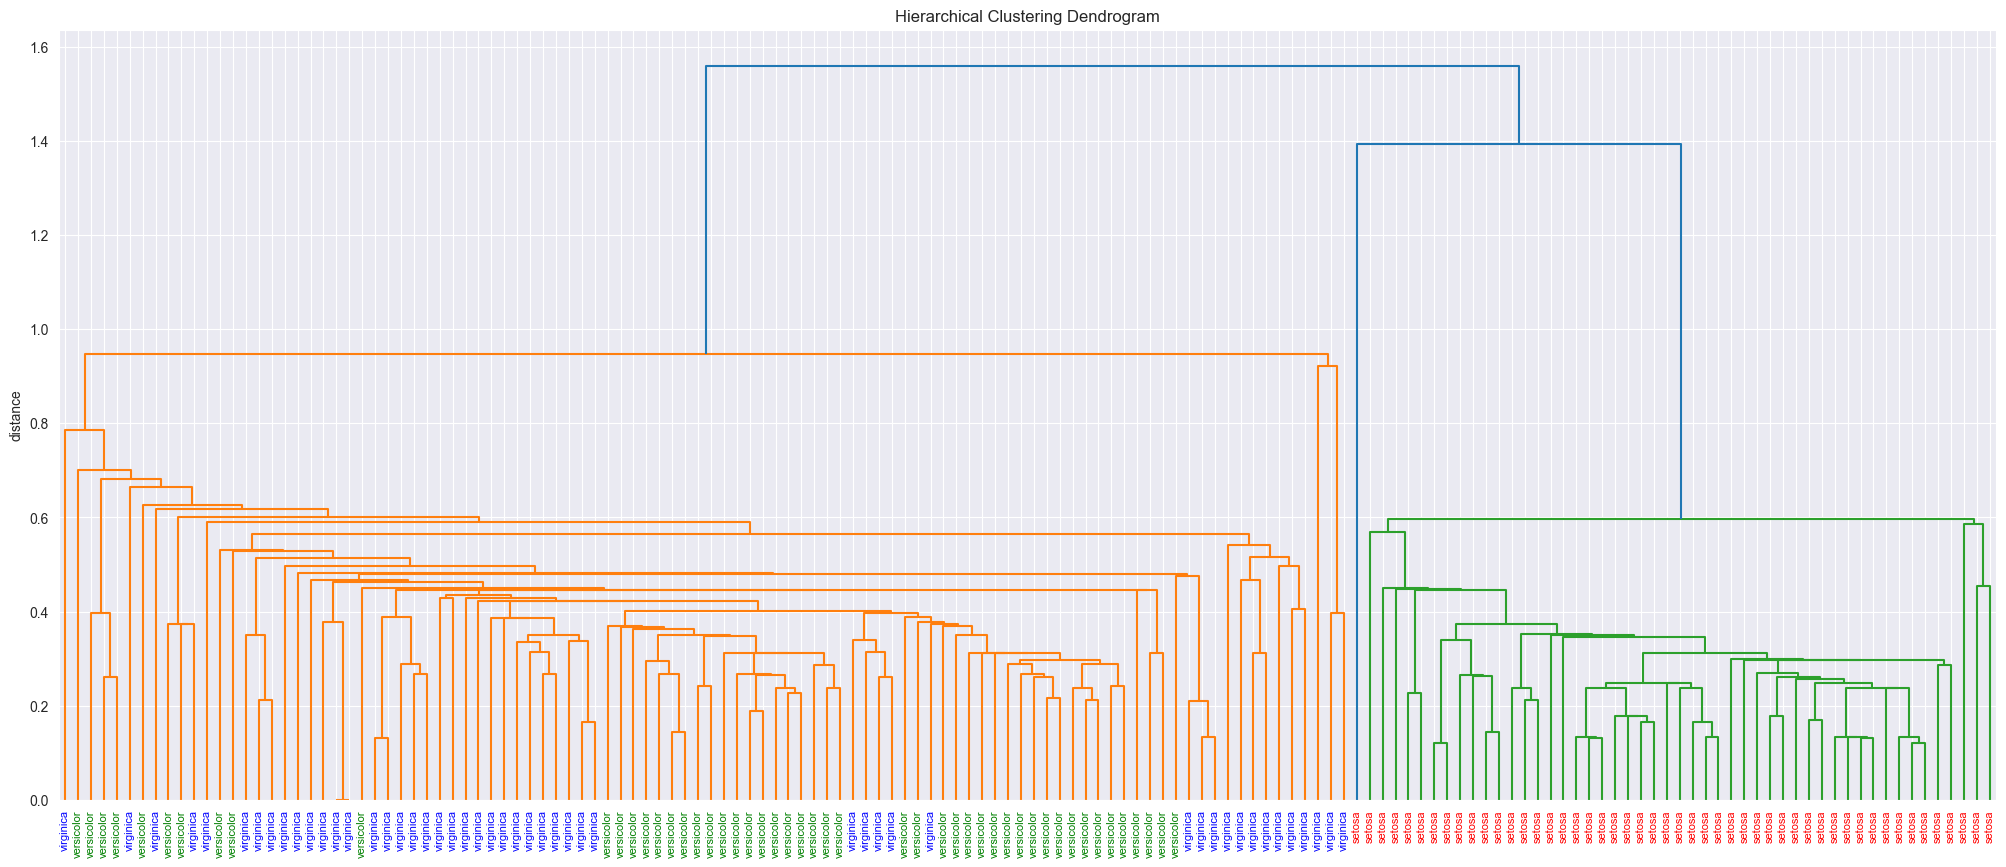

In [8]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

plt.figure(figsize=(25, 10))   # Creates a generic figure
dendrogram(                             # Creates the dendogram
            Z,
            labels=np.array(iris_df.iloc[:,4]),    #  select the labels
            leaf_rotation=90.,  # rotates the x-axis labels
            leaf_font_size=8,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

### With scikit-learn

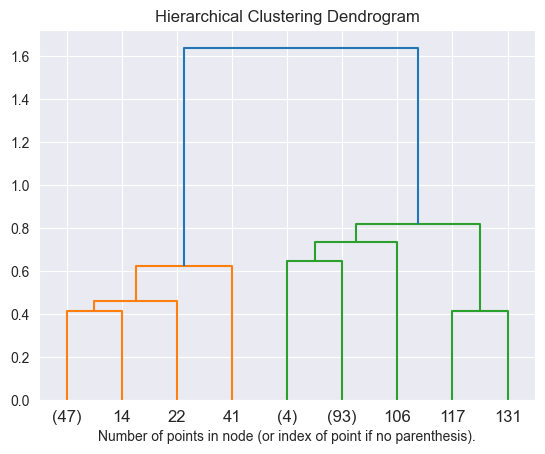

In [9]:
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for index, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[index] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = iris_df.iloc[:,:4]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single", metric="euclidean")

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Testing different linkage methods

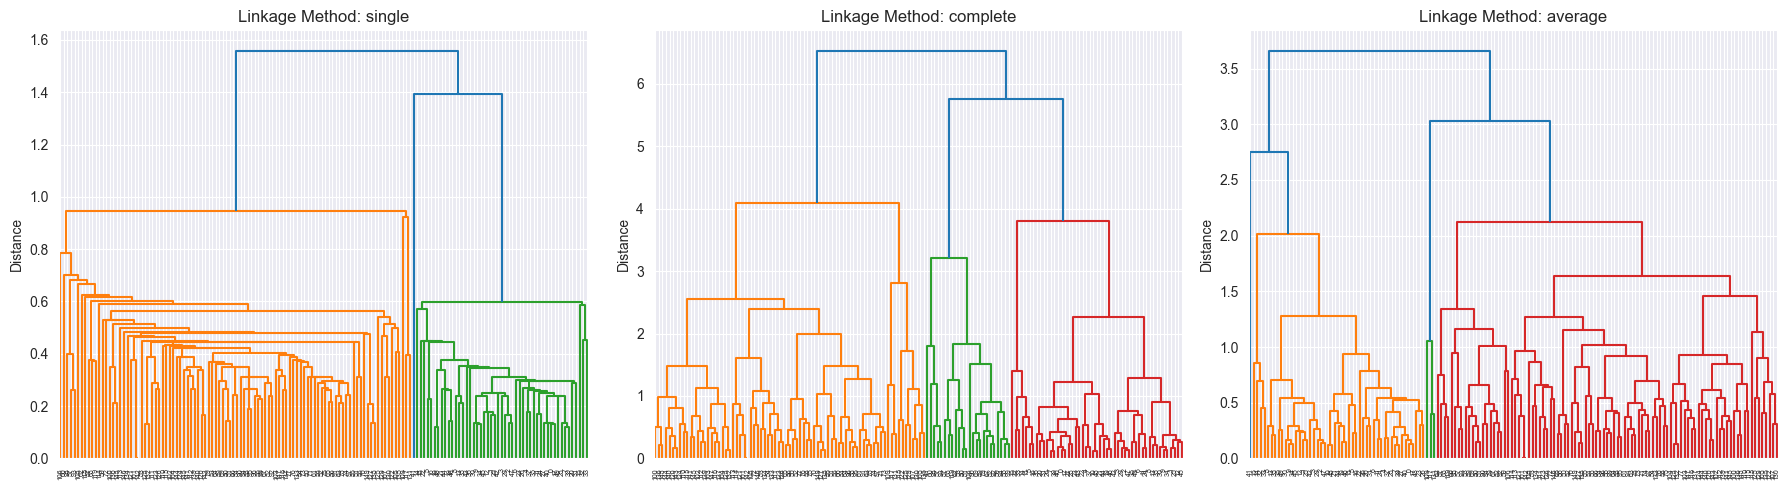

In [10]:
# Define the linkage methods to test
linkage_methods = ['single', 'complete', 'average']

# Create subplots
fig, axs = plt.subplots(1, len(linkage_methods), figsize=(18, 5))

# Iterate through each linkage method
for i, linkage_method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    Z = linkage(iris_scaled, method=linkage_method)
    
    # Plot dendrogram
    axs[i].set_title(f'Linkage Method: {linkage_method}')
    dendrogram(Z, ax=axs[i])
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

### Testing different distance metrics

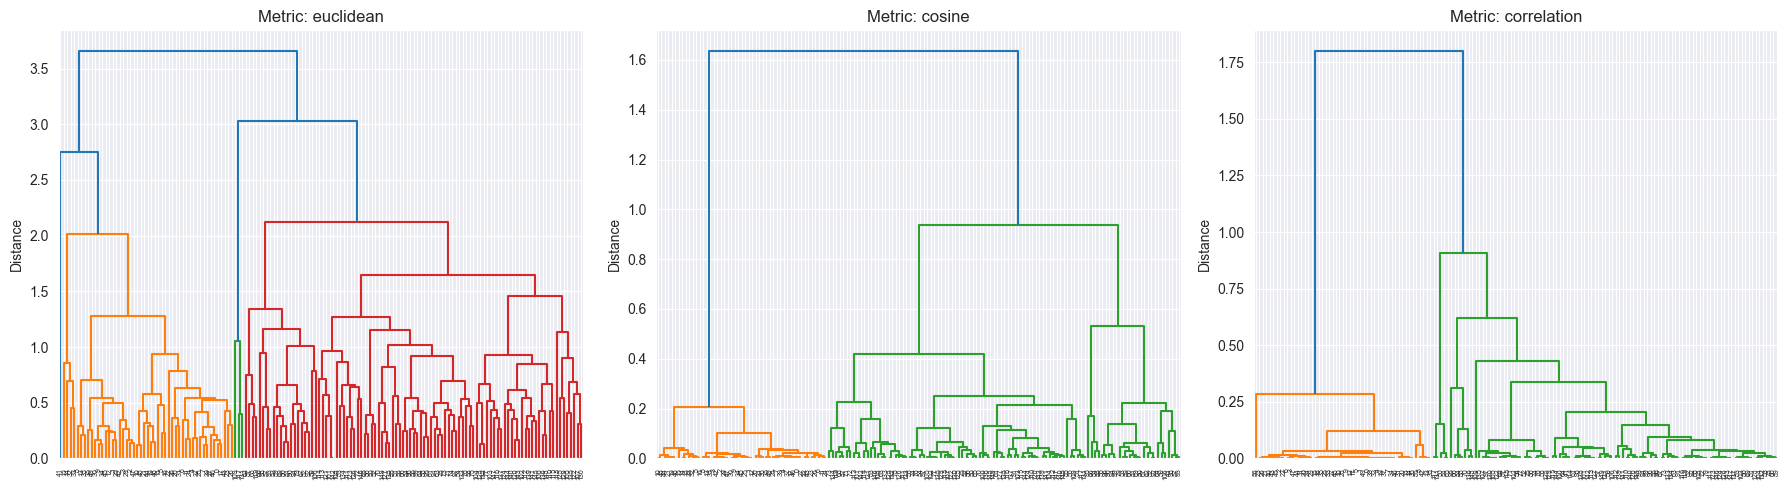

In [11]:
metrics = ['euclidean', 'cosine', 'correlation']

# Create subplots
fig, axs = plt.subplots(1, len(linkage_methods), figsize=(18, 5))

# Iterate through each linkage method
for i, metric in enumerate(metrics):
    # Perform hierarchical clustering
    Z = linkage(iris_scaled, method='average', metric=metric)
    
    # Plot dendrogram
    axs[i].set_title(f'Metric: {metric}')
    dendrogram(Z, ax=axs[i])
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

## K-means clustering

In [12]:
from sklearn.cluster import KMeans

k=3
kmeans_iris = KMeans(n_clusters=k, max_iter=1000, n_init = 10)
## max_iter - number of iterations of the algorithm in each run
## n_init - number of runs from the algorithm - the solution is the one with the best objective function value
kmeans_iris.fit(iris_scaled)
labels = kmeans_iris.labels_
centroids = kmeans_iris.cluster_centers_

pd.crosstab(labels, iris_df["Species"], rownames=['clusters'])

Species,setosa,versicolor,virginica
clusters,,,
0,0,11,36
1,50,0,0
2,0,39,14


### Plot the clusters + centroids (only 2 first features)

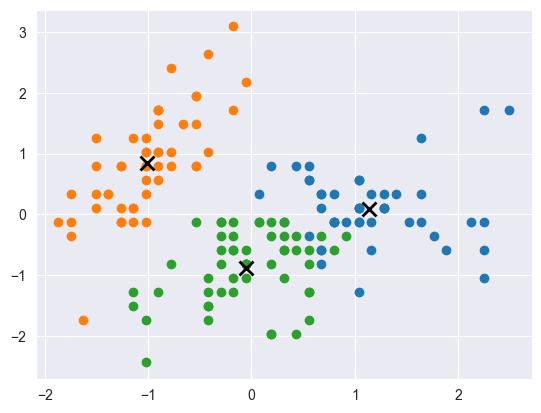

In [13]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = iris_scaled[np.where(labels==i)]
    # plot the data observations (only 2 first colums; change 0 and 1 to see others)
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    # line width
    
plt.show()

### pairplot with hue for correlation analysis

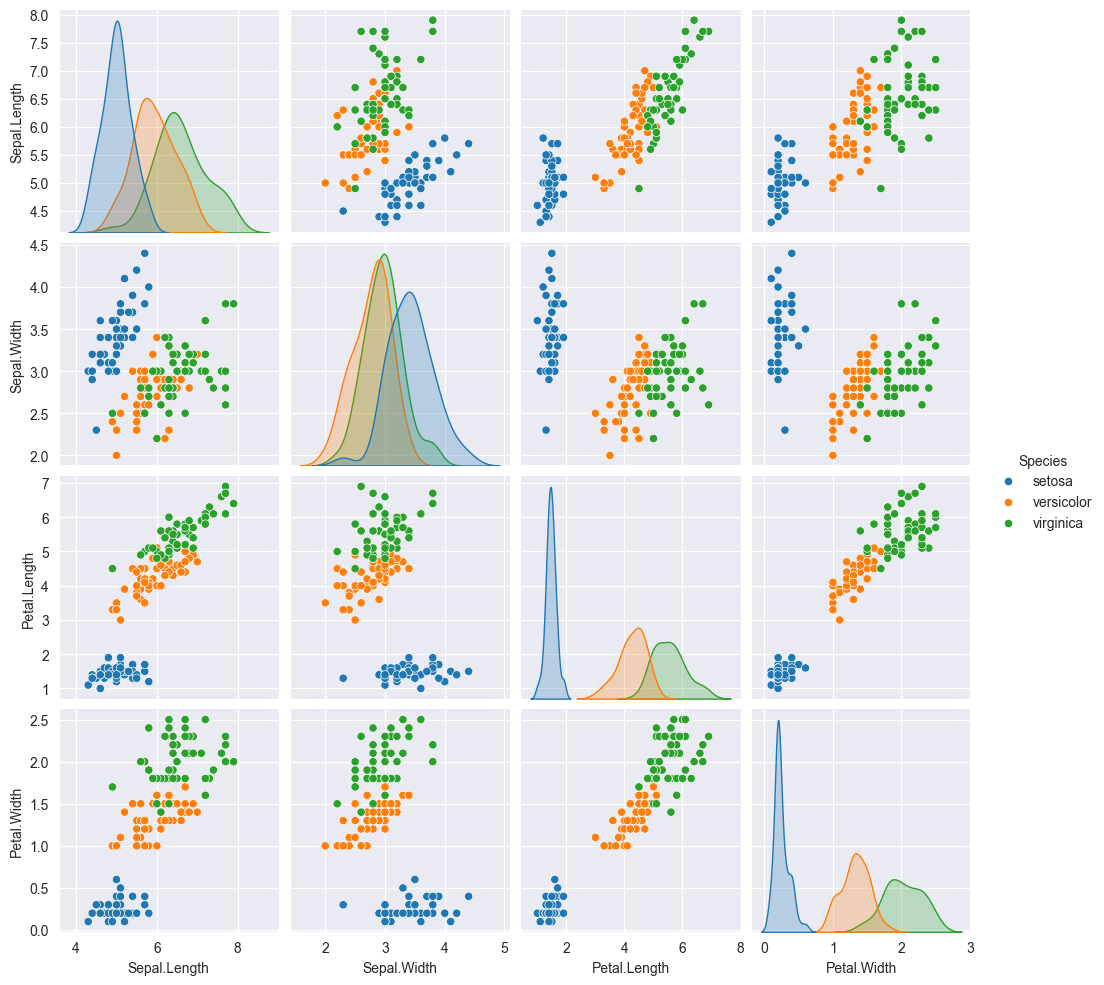

In [14]:
import seaborn as sns

sns.pairplot(iris_df, hue="Species")

### Elbow method to find the best number of clusters

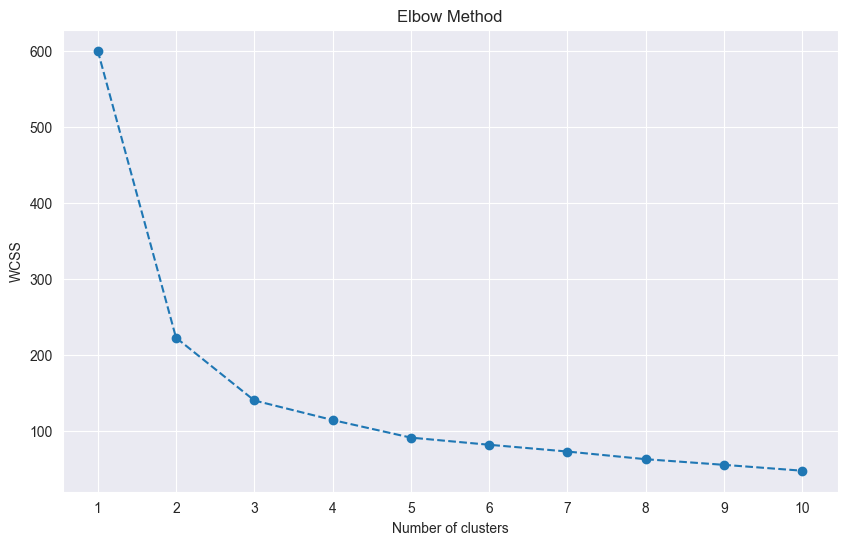

In [15]:
# Calculating WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(iris_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Testing different initialization methods

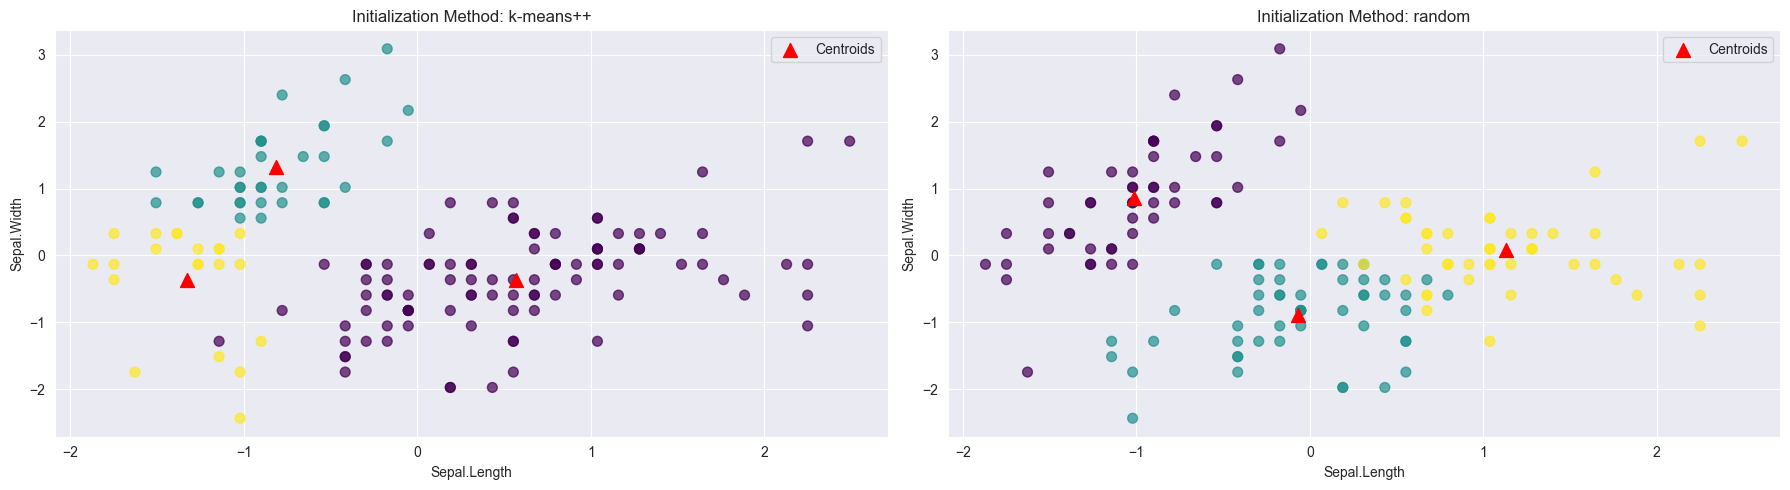

In [16]:
# List of initialization methods to test
init_methods = ['k-means++', 'random']
# K-means++ is a smart initialization technique, the algorithm selects the initial centers in a way that makes the algorithm faster and more accurate
# using sample points from the data set to initialize the centroids

# Create subplots
fig, axs = plt.subplots(1, len(init_methods), figsize=(18, 5))

# Iterate through each initialization method
for i, init_method in enumerate(init_methods):
    # Create KMeans instance with the specified initialization method
    kmeans = KMeans(n_clusters=k, init=init_method, random_state=42)
    
    # Fit the model
    kmeans.fit(iris_scaled)
    
    # Predict the cluster labels
    labels = kmeans.labels_
    
    # Plot the clusters
    axs[i].scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    axs[i].set_title(f'Initialization Method: {init_method}')
    axs[i].set_xlabel(iris_df.columns[0])
    axs[i].set_ylabel(iris_df.columns[1])
    axs[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='red', s=100, label='Centroids')
    axs[i].legend()

plt.tight_layout()
plt.show()